# Comparative Analysis of Learning Algorithms for Predicting Customer Churn in Telcom

Detailed break down of each section of the report

IMPORTING THE REQUIRED LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset 

In [2]:
df=pd.read_csv("Statistical machine learning/Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()  #importing the header column to check quickly whether the data is in correct format or not


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


descrbing the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

FINDING THE MEAN,MEDIAN,MODE

In [8]:
mean=df['MonthlyCharges'].mean()
median=df['MonthlyCharges'].median()
mode=df['MonthlyCharges'].mode().values[0]
print(f'mean is {mean:.2f}')
print(f'median is {median:.2f}')
print(f'mode is {mode:.2f}')

mean is 64.76
median is 70.35
mode is 20.05


F-TEST ANOVA

In [9]:
f_statistic, p_value = f_oneway(df['MonthlyCharges'][df['Contract'] == 'Month-to-month'],
                                 df['MonthlyCharges'][df['Contract'] == 'One year'],
                                 df['MonthlyCharges'][df['Contract'] == 'Two year'])
print(f'F-Statistic: {f_statistic:.2f}')
print(f'P-Value: {p_value:.2f}')

F-Statistic: 20.83
P-Value: 0.00


T-TEST

In [10]:
group_a = df[df['Churn'] == 'Yes']['MonthlyCharges']
group_b = df[df['Churn'] == 'No']['MonthlyCharges']
t_statistic, p_value = ttest_ind(group_a, group_b)
print(f'T-Statistic: {t_statistic:.2f}')
print(f'P-Value: {p_value:.2f}')

T-Statistic: 16.54
P-Value: 0.00


CHI-TEST

In [11]:
contigency_table=pd.crosstab(df['Churn'],df['InternetService'])
chi_statistic,p_value,dof,expected=chi2_contingency(contigency_table)
print(f'chi_statistic value is {chi_statistic:.2f}')
print(f'p_value is {p_value:.2f}')

chi_statistic value is 732.31
p_value is 0.00


HISTOGRAM FOR NUMERICAL VALUES


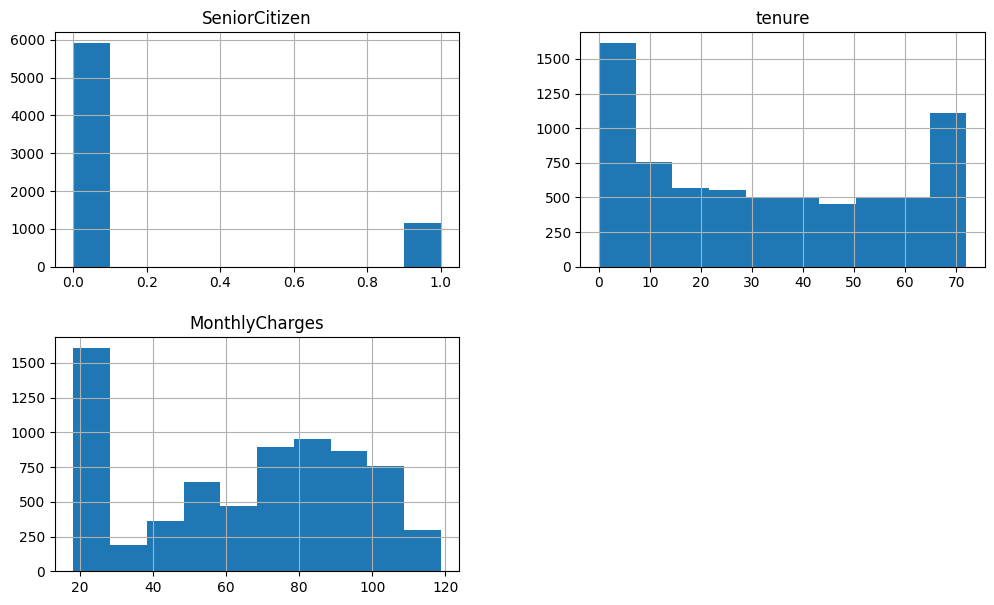

In [12]:
df.hist(figsize=(12,7))
plt.show()

HANDLING THE MISSING VALUES

In [13]:
df['TotalCharges']=df['TotalCharges'].replace(' ',0).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

ENCODING THE CATEGORICAL VARIABLES

In [14]:
categorical_variables=df.select_dtypes(include=['object']).columns
data_encoded=pd.get_dummies(df,columns=categorical_variables,drop_first=True)

SPLITTING THE DATA INTO FEATURE AND TARGET VARIBALES

In [15]:
X=data_encoded.drop(['Churn_Yes'],axis=1)
Y=data_encoded['Churn_Yes']

NOW SPLITTING INTO TRAINING AND TESTING 

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

STANDARDIZE NUMERICAL VALUES

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# SUPERVISED LEARNING

Initializing Classifiers

In [20]:
model_linear=LinearRegression()
model_logistic=LogisticRegression()
model_decisiontree=DecisionTreeClassifier()
model_randomforest=RandomForestClassifier()
model_knn=KNeighborsClassifier()

In [23]:
classifiers={
    "Linear_regression":model_linear,
    "Logistic_regression":model_logistic,
    "Decsion_Tree":model_decisiontree,
    "Random_forest":model_randomforest,
    "KNN":model_knn}

MODEL TRAINING AND EVALUATION

In [28]:
results={}
for name,clf in classifiers.items():
    clf.fit(X_train_scaled,Y_train)
    accuracy=clf.score(X_test_scaled,Y_test)
    results[name]=accuracy

In [30]:
for name,accuracy in results.items():
    print(f'name {name}:Accuracy {accuracy:.2f}')

name Linear_regression:Accuracy 0.27
name Logistic_regression:Accuracy 0.79
name Decsion_Tree:Accuracy 0.77
name Random_forest:Accuracy 0.80
name KNN:Accuracy 0.78
